# Project: Python Research 1
   * **Case Study 1:** we will create our own Caesar cipher, as well as a message decoder for this cipher.
   
   
   * **Case Study 2:** we will find and plot the distribution of word frequencies for different translations of Hamlet.
   
   
   * **Case Study 3:** we will analyze a dataset consisting of an assortment of wines classified as "high quality" and "low quality" and will use **Nearest Neighbors classification** to determine whether or not other information about the wine helps us correctly guess whether a new wine will be of high quality.

## Case Study 1

A cipher is a secret code for a language.  In this case study, we will explore a cipher that is reported by contemporary Greek historians to have been used by Julius Caesar to send secret messages to generals during times of war.

### Exercise 1

A cipher is a secret code for a language. In this case study, we will explore a cipher that is reported by contemporary Greek historians to have been used by Julius Caesar to send secret messages to generals during times of war.

The Caesar cipher shifts each letter of a message to another letter in the alphabet located a fixed distance from the original letter. If our encryption key were `1`, we would shift `h` to the next letter `i`, `i` to the next letter `j`, and so on. If we reach the end of the alphabet, which for us is the space character, we simply loop back to `a`. To decode the message, we make a similar shift, except we move the same number of steps backwards in the alphabet.

Over the next five exercises, we will create our own Caesar cipher, as well as a message decoder for this cipher. In this exercise, we will define the alphabet used in the cipher.

#### Instructions
- The `string` library has been imported. Create a string called `alphabet` consisting of the space character `' '` followed by (concatenated with) the lowercase letters. Note that we're only using the lowercase letters in this exercise.

In [1]:
import string

alphabet = " " + string.ascii_lowercase
alphabet

' abcdefghijklmnopqrstuvwxyz'

In [2]:
string?

### Exercise 2 

In this exercise, we will define a dictionary that specifies the index of each character in `alphabet`.

#### Instructions 
- `alphabet` has already defined in the last exercise. Create a dictionary with keys consisting of the characters in alphabet and values consisting of the numbers from 0 to 26.
- Store this as `positions`.

In [6]:
positions = {}
j = 0
for i in alphabet:
    positions[i] = j
    j += 1


positions

{' ': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [7]:
positions["n"]

14

### Exercise 3

In this exercise, we will encode a message with a Caesar cipher.

#### Instructions 

* `alphabet` and `positions` have already been defined in previous exercises. Use `positions` to create an encoded message based on message where each character in message has been shifted forward by 1 position, as defined by positions.
* **Note that you can ensure the result remains within 0-26 using result % 27**
* Store this as `encoded_message`.

In [8]:
message = "hi my name is caesar"

encoded_message = ""
for i in message:
    corrected_position = (positions[i]+1) % 27
    encoded_message += alphabet[corrected_position]
    
encoded_message

'ijanzaobnfajtadbftbs'

### Exercise 4

In this exercise, we will define a function that encodes a message with any given encryption key.

#### Instructions 
- `alphabet`, `position` and `message` remain defined from previous exercises. Define a function `encoding` that takes a message as input as well as an int encryption key `key` to encode a message with the Caesar cipher by shifting each letter in message by key positions.
- Your function should return a string consisting of these encoded letters.
- Use `encoding` to encode message using `key = 3` and save the result as `encoded_message`.
Print `encoded_message`.

In [9]:
def encoding(message,key):
    encoded_message = ""
    for i in message:
        corrected_position = (positions[i]+key) % 27
        encoded_message += alphabet[corrected_position]
    return encoded_message
    
encoded_message = encoding(message,3)
encoded_message

'klcpacqdphclvcfdhvdu'

In [10]:
a = "juaxbtakvtuagjof"
for i in range(27):
    print(encoding(a,i),i)

juaxbtakvtuagjof 0
kvbycublwuvbhkpg 1
lwczdvcmxvwcilqh 2
mxd ewdnywxdjmri 3
nyeafxeozxyeknsj 4
ozfbgyfp yzflotk 5
p gchzgqaz gmpul 6
qahdi hrb ahnqvm 7
rbiejaiscabiorwn 8
scjfkbjtdbcjpsxo 9
tdkglckuecdkqtyp 10
uelhmdlvfdelruzq 11
vfminemwgefmsv r 12
wgnjofnxhfgntwas 13
xhokpgoyighouxbt 14
yiplqhpzjhipvycu 15
zjqmriq kijqwzdv 16
 krnsjraljkrx ew 17
alsotksbmklsyafx 18
bmtpultcnlmtzbgy 19
cnuqvmudomnu chz 20
dovrwnvepnovadi  21
epwsxowfqopwbeja 22
fqxtypxgrpqxcfkb 23
gryuzqyhsqrydglc 24
hszv rzitrszehmd 25
it was just fine 26


### Exercise 5

In this exercise, we will decode an encoded message.

#### Instructions 
- Use `encoding` to decode `encoded_message`.
- Store your encoded message as `decoded_message`.
- Print `decoded_message`. Does this recover your original message?

In [11]:
decoded_message = encoding(encoded_message,24)
decoded_message

'hi my name is caesar'

## Case Study 2

In this case study, we will find and plot the distribution of word frequencies for each translation of Hamlet.  Perhaps the distribution of word frequencies of Hamlet depends on the translation --- let's find out!

In [12]:
import os
import pandas as pd
import numpy as np
from collections import Counter

def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

### Exercise 1 

In this case study, we will find and visualize summary statistics of the text of different translations of Hamlet. For this case study, functions `count_words_fast` and `word_stats` are already defined as in the Case 2 Videos (Videos 3.2.x).

#### Instructions 
- Read in the data as a pandas dataframe using `pd.read_csv`. Use the `index_col` argument to set the first column in the csv file as the index for the dataframe. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@hamlets.csv

In [16]:
os.getcwd()

'C:\\Users\\egopo\\Desktop\\Python\\Using Python for Research\\Project - Python Research 1'

In [18]:
file = "./hamlet.csv"

hamlets = pd.read_csv(file, index_col=0)

hamlets

,language,text
1,English,The Tragedie of Hamlet\n ...
2,German,"Hamlet, Prinz von Dännemark.\n ..."
3,Portuguese,HAMLET\n DRAMA EM ...


### Exercise 2 

In this exercise, we will summarize the text for a single translation of Hamlet in a `pandas` dataframe. 

#### Instructions
- Find the dictionary of word frequency in `text` by calling `count_words_fast()`. Store this as `counted_text`.
- Create a `pandas` dataframe named `data`.
- Using `counted_text`, define two columns in data:
    - `word`, consisting of each unique word in text.
    - `count`, consisting of the number of times each word in `word` is included in the text.

In [19]:
language, text = hamlets.iloc[0] # prints the first language (English) and the first text (the English version)

counted_text = count_words_fast(text)

data = pd.DataFrame(counted_text.items(), columns = ("word","count"))

data

,word,count
0,the,935
1,tragedie,3
2,of,576
3,hamlet,97
4,,45513
...,...,...
5108,shooteexeunt,1
5109,marching,1
5110,peale,1
5111,ord,1


In [20]:
data[data.word == "hamlet"]

,word,count
3,hamlet,97


In [24]:
counted_text = count_words_fast(text)

course_data = pd.DataFrame({
    "word": counted_text.keys(),
    "count": counted_text.values()
})

course_data

,word,count
0,the,935
1,tragedie,3
2,of,576
3,hamlet,97
4,,45513
...,...,...
5108,shooteexeunt,1
5109,marching,1
5110,peale,1
5111,ord,1


### Exercise 3

In this exercise, we will continue to define summary statistics for a single translation of Hamlet. 

#### Instructions
- Add a column to data named `length`, defined as the length of each word.
- Add another column named `frequency`, which is defined as follows for each word in `data`:
    - If `count > 10`, `frequency` is "frequent".
    - If `1 < count <= 10`, `frequency` is "infrequent".
    - If `count == 1`, `frequency` is "unique".

In [26]:
length = []
for i in counted_text.keys():
    length.append(len(i))
    
data["length"] = length

In [28]:
freq = []

for count in counted_text.values():
    if count>10:
        freq.append("frequent")
    elif 1 < count <= 10:
        freq.append("infrequent")
    else:
        freq.append("unique")
    
data["frequency"] = freq

data

,word,count,length,frequency
0,the,935,3,frequent
1,tragedie,3,8,infrequent
2,of,576,2,frequent
3,hamlet,97,6,frequent
4,,45513,0,frequent
...,...,...,...,...
5108,shooteexeunt,1,12,unique
5109,marching,1,8,unique
5110,peale,1,5,unique
5111,ord,1,3,unique


In [29]:
len(data[data.frequency == "unique"])

3348

In [30]:
len(data[data["count"] == 1]) == len(data[data.frequency == "unique"])

True

In [31]:
course_data["length"] = course_data["word"].apply(len)

# we define a new column called "length" applying len() function to each word under the category 'word'

course_data.loc[data["count"] > 10,  "frequency"] = "frequent"
course_data.loc[data["count"] <= 10, "frequency"] = "infrequent"
course_data.loc[data["count"] == 1,  "frequency"] = "unique"

course_data.groupby('frequency').count()

,word,count,length
frequency,,,
frequent,323,323,323
infrequent,1442,1442,1442
unique,3348,3348,3348


**groupby:** A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [32]:
# For example

course_data.groupby("frequency").mean() # "mean" is a function in Pandas library

,count,length
frequency,,
frequent,203.182663,4.371517
infrequent,3.509015,5.825243
unique,1.000000,7.005675


In [33]:
course_data.groupby("frequency").size() # "size" shows the total number of objects belong to a spesific category

frequency
frequent       323
infrequent    1442
unique        3348
dtype: int64

**IMPORTANT:** You cannot use **apply** for functions such as mean(), size() because they are defined in pandas data frame but you can use it for functions such as len()

Suppose you want to take **average of lengths** under the length category according to **frequency category** they belong

In [34]:
course_data.groupby("frequency")["length"].mean()

frequency
frequent      4.371517
infrequent    5.825243
unique        7.005675
Name: length, dtype: float64

### Exercise 4

In this exercise, we will summarize the statistics in data into a smaller pandas dataframe. 

#### Instructions 
- Create a `pandas` dataframe named `sub_data` including the following columns:
    - `language`, which is the language of the text (defined in Exercise 2).
    - `frequency`, which is a list containing the strings "frequent", "infrequent", and "unique".
    - `mean_word_length`, which is the mean word length of each value in frequency.
    - `num_words`, which is the total number of words in each frequency category.

In [35]:
sub_data = pd.DataFrame({
    "language": language,
    "frequency": ["frequent","infrequent","unique"], # this is just a list of strings
    "mean_word_length": data.groupby("frequency")["length"].mean(),
    "num_words": data.groupby("frequency").size()
})

sub_data

,language,frequency,mean_word_length,num_words
frequency,,,,
frequent,English,frequent,4.371517,323
infrequent,English,infrequent,5.825243,1442
unique,English,unique,7.005675,3348


### Exercise 5

In this exercise, we will join all the data summaries for text Hamlet translation.

#### Instructions 
- The previous code for summarizing a particular translation of Hamlet is consolidated into a single function called `summarize_text`. Create a pandas dataframe` grouped_data` consisting of the results of `summarize_text` for each translation of Hamlet in `hamlets`.
    - Use a `for` loop across the row indices of `hamlets` to assign each translation to a new row.
    - Obtain the `ith` row of `hamlets` to variables using the `.iloc` method, and assign the output to variables `language` and `text`.
    - Call `summarize_text` using `language` and `text`, and assign the output to `sub_data`.
    - Use the pandas `.append()` function to append to pandas dataframes row-wise to `grouped_data`.

In [37]:
hamlets

,language,text
1,English,The Tragedie of Hamlet\n ...
2,German,"Hamlet, Prinz von Dännemark.\n ..."
3,Portuguese,HAMLET\n DRAMA EM ...


In [40]:
language, text = hamlets.iloc[0]

language

'English'

In [41]:
def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": counted_text.keys(),
        "count": counted_text.values()
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)


grouped_data = pd.DataFrame(columns = ["language", "frequency", "mean_word_length", "num_words"])
# IMPORTANT: Even though your data frame is empty, it must have the same column names as the added sub data frames

for i in hamlets.index: # 'hamlets.index' to for-loop in the index of hamlets
    language, text = hamlets.iloc[i-1] # since index of hamlets start with 1
    sub_data = summarize_text(language, text)
    grouped_data = grouped_data.append(sub_data) # append() appends row to a DataFrame
    
grouped_data

,language,frequency,mean_word_length,num_words
frequent,English,frequent,4.371517,323
infrequent,English,infrequent,5.825243,1442
unique,English,unique,7.005675,3348
frequent,German,frequent,4.528053,303
infrequent,German,infrequent,6.481830,1596
unique,German,unique,9.006987,5582
frequent,Portuguese,frequent,4.417625,261
infrequent,Portuguese,infrequent,6.497870,1643
unique,Portuguese,unique,8.669778,5357


### Exercise 6

In this exercise, we will plot our results and look for differences across each translation.

#### Instructions 
- Plot the word statistics of each translations on a single plot. Note that we have already done most of the work for you.
- Consider: do the word statistics differ by translation?

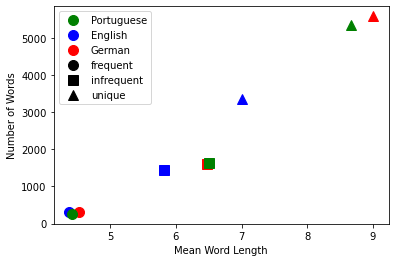

<Figure size 432x288 with 0 Axes>

In [42]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left");

plt.xlabel("Mean Word Length");
plt.ylabel("Number of Words");

plt.figure();

## Case Study 3

In this case study, we will analyze a dataset consisting of an assortment of wines classified as *high quality* and *low quality* and will use **k-Nearest Neighbors classification** to determine whether or not other information about the wine helps us correctly guess whether a new wine will be of high quality.

In [1]:
import numpy as np, random, scipy.stats as ss

def majority_vote_fast(votes):
    mode, count = ss.mstats.mode(votes)
    return mode

def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote_fast(outcomes[ind])[0]

### Exercise 1

Our first step is to import the dataset.

#### Instructions 
- Read in the data as a pandas dataframe using `pd.read_csv`. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@wine.csv

In [2]:
import pandas as pd

file = "./wines.csv"

wines = pd.read_csv(file, index_col=0)

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


### Exercise 2

Next, we will inspect the dataset and perform some mild data cleaning.

#### Instructions 
- In order to get all numeric data, we will change the `color` column to an `is_red` column. 
    - If `color == 'red'`, we will encode a `1` for `is_red`
    - If `color == 'white'`, we will encode a `0` for `is_red`
- Create this new column, `is_red`.
- Drop the `color`, `quality`, and `high_quality` columns as we will be predict the quality of wine using numeric data in a later exercise
- Store this all numeric data in a pandas dataframe called `numeric_data`

In [3]:
is_red = []
for i in wines.color:
    if i == "red":
        is_red.append(1)
    else:
        is_red.append(0)

wines["is_red"] = is_red

wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1,0


In [4]:
len(wines[wines.is_red == 1])

1599

In [5]:
numeric_data = wines.drop(["color", "high_quality", "quality"], axis=1)
# 'axis=1' because we're dropping a column

numeric_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [13]:

wines["is_red"] = (wines["color"] == "red").astype(int)
numeric_data = wines.drop("color", axis=1)

numeric_data.groupby('is_red').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
is_red,,,,,,,,,,,,,
0,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
1,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599


### Exercise 3

We want to ensure that each variable contributes equally to the kNN classifier, so we will need to scale the data by subtracting the mean of each variable (column) and dividing each variable (column) by its standard deviation. Then, we will use principal components to take a linear snapshot of the data from several different angles, with each snapshot ordered by how well it aligns with variation in the data. In this exercise, we will scale the numeric data and extract the first two principal components.

#### Instructions 
- Scale the data using the `sklearn.preprocessing` function `scale()` on `numeric_data`.
- Convert this to a `pandas` dataframe, and store as `numeric_data`.
    - Include the numeric variable names using the parameter `columns = numeric_data.columns`.
- Use the `sklearn.decomposition` module `PCA()` and store it as `pca`.
- Use the `fit_transform()` function to extract the first two principal components from the data, and store them as `principal_components`.
- *Note*: You may get a `DataConversionWarning`, but you can safely ignore it

In [6]:
import sklearn.preprocessing
scaled_data = sklearn.preprocessing.scale(numeric_data)
numeric_data = pd.DataFrame(scaled_data, columns = numeric_data.columns)

columns = numeric_data.columns

import sklearn.decomposition
pca = sklearn.decomposition.PCA()
principal_components = pca.fit_transform(numeric_data)

principal_components.shape

(6497, 12)

### Exercise 4

In this exercise, we will plot the first two principal components of the covariates in the dataset. The high and low quality wines will be colored using red and blue, respectively.

#### Instructions 
- The first two principal components can be accessed using `principal_components[:,0]` and `principal_components[:,1]`. Store these as `x` and `y` respectively, and make a scatter plot of these first two principal components.
- How well are the two groups of wines separated by the first two principal components?

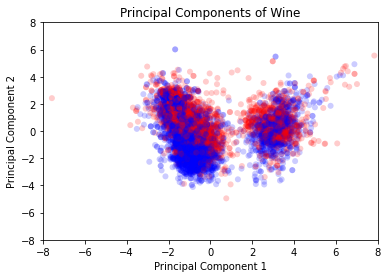

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
observation_colormap = ListedColormap(['red', 'blue'])
x = principal_components[:,0]
y = principal_components[:,1]

plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2,
    c = wines['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
plt.savefig("Principle Components of Wine.png")

**Result:** We could not easily draw a linear boundary between the high and low quality wines using the first two principle components

### Exercise 5

In this exercise, we will create a function that calculates the accuracy between predictions and outcomes.

#### Instructions
- Create a function `accuracy(predictions, outcomes)` that takes two lists of the same size as arguments and returns a single number, which is the percentage of elements that are equal for the two lists.
- Use accuracy to compare the percentage of similar elements in the `x` and `y` `numpy` arrays defined below.
- Print your answer.

In [8]:
import numpy as np 
np.random.seed(1) # do not change

x = np.random.randint(0, 2, 1000)
y = np.random.randint(0 ,2, 1000)

def accuracy(predictions, outcomes):
    return 100*np.mean(predictions == outcomes)

accuracy(x,y)

51.5

### Exercise 6

The dataset remains stored as data. Because most wines in the dataset are classified as low quality, one very simple classification rule is to predict that all wines are of low quality. In this exercise, we determine the accuracy of this simple rule. 

#### Instructions
- Use `accuracy()` to calculate how many wines in the dataset are of low quality. Do this by using 0 as the first argument, and `data["high_quality"]` as the second argument.
- Print your result.

In [9]:
print(accuracy(0, wines["high_quality"]))

36.69385870401724


### Exercise 7 

In this exercise, we will use the kNN classifier from `scikit-learn` to predict the quality of wines in our dataset.

#### Instructions
- Use `knn.predict(numeric_data)` to predict which wines are high and low quality and store the result as `library_predictions`.
- Use `accuracy` to find the accuracy of your predictions, using `library_predictions` as the first argument and `data["high_quality"]` as the second argument.
- Print your answer. Is this prediction better than the simple classifier in Exercise 6?

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, wines['high_quality'])

library_predictions = knn.predict(numeric_data)
# to predict which wines are high/low quality

accuracy(library_predictions, wines['high_quality'])
# It return around 84, which means kNN classifier predicts more accurately from the simple classifier we defined in Exercise 6

84.14652916730799

### Exercise 8

Unlike the `scikit-learn` function, our homemade kNN classifier does not take any shortcuts in calculating which neighbors are closest to each observation, so it is likely too slow to carry out on the whole dataset. In this exercise, we will select a subset of our data to use in our homemade kNN classifier.

#### Instructions 
- Fix the random generator using `random.seed(123)`, and select 10 rows from the dataset using `random.sample(range(n_rows), 10)`. Store this selection as `selection`.

In [11]:
n_rows = wines.shape[0]
# Enter your code here.

import random
random.seed(123)

selection = random.sample(range(n_rows), 10)

selection[9]

4392

### Exercise 9

We are now ready to use our homemade kNN classifier and compare the accuracy of our results to the baseline.

#### Instructions 
- For each predictor` p` in `predictors[selection]`, use `knn_predict(p, predictors[training_indices,:], outcomes[training_indices], k=5)` to predict the quality of each wine in the prediction set, and store these predictions as a np.array called `my_predictions`. Note that knn_predict is already defined as in the Case 3 videos.
- Using the `accuracy` function, compare these results to the selected rows from the `high_quality` variable in data using `my_predictions` as the first argument and `data.high_quality.iloc[selection]` as the second argument. Store these results as `percentage`.
- Print your answer.

In [18]:
predictors = np.array(numeric_data)
training_indices = [i for i in range(len(predictors)) if i not in selection]
outcomes = np.array(wines["high_quality"])

my_predictions = []
for p in predictors[selection]:
    a = knn_predict(p, predictors[training_indices,:], outcomes[training_indices], k=5)
    my_predictions.append(a)
my_predictions = np.array(my_predictions)

percentage = accuracy(my_predictions, wines.high_quality.iloc[selection])

percentage

80.0